In [ ]:
import keras
from keras import layers
from keras.utils import plot_model

import matplotlib.pyplot as plt

## Creating an AE

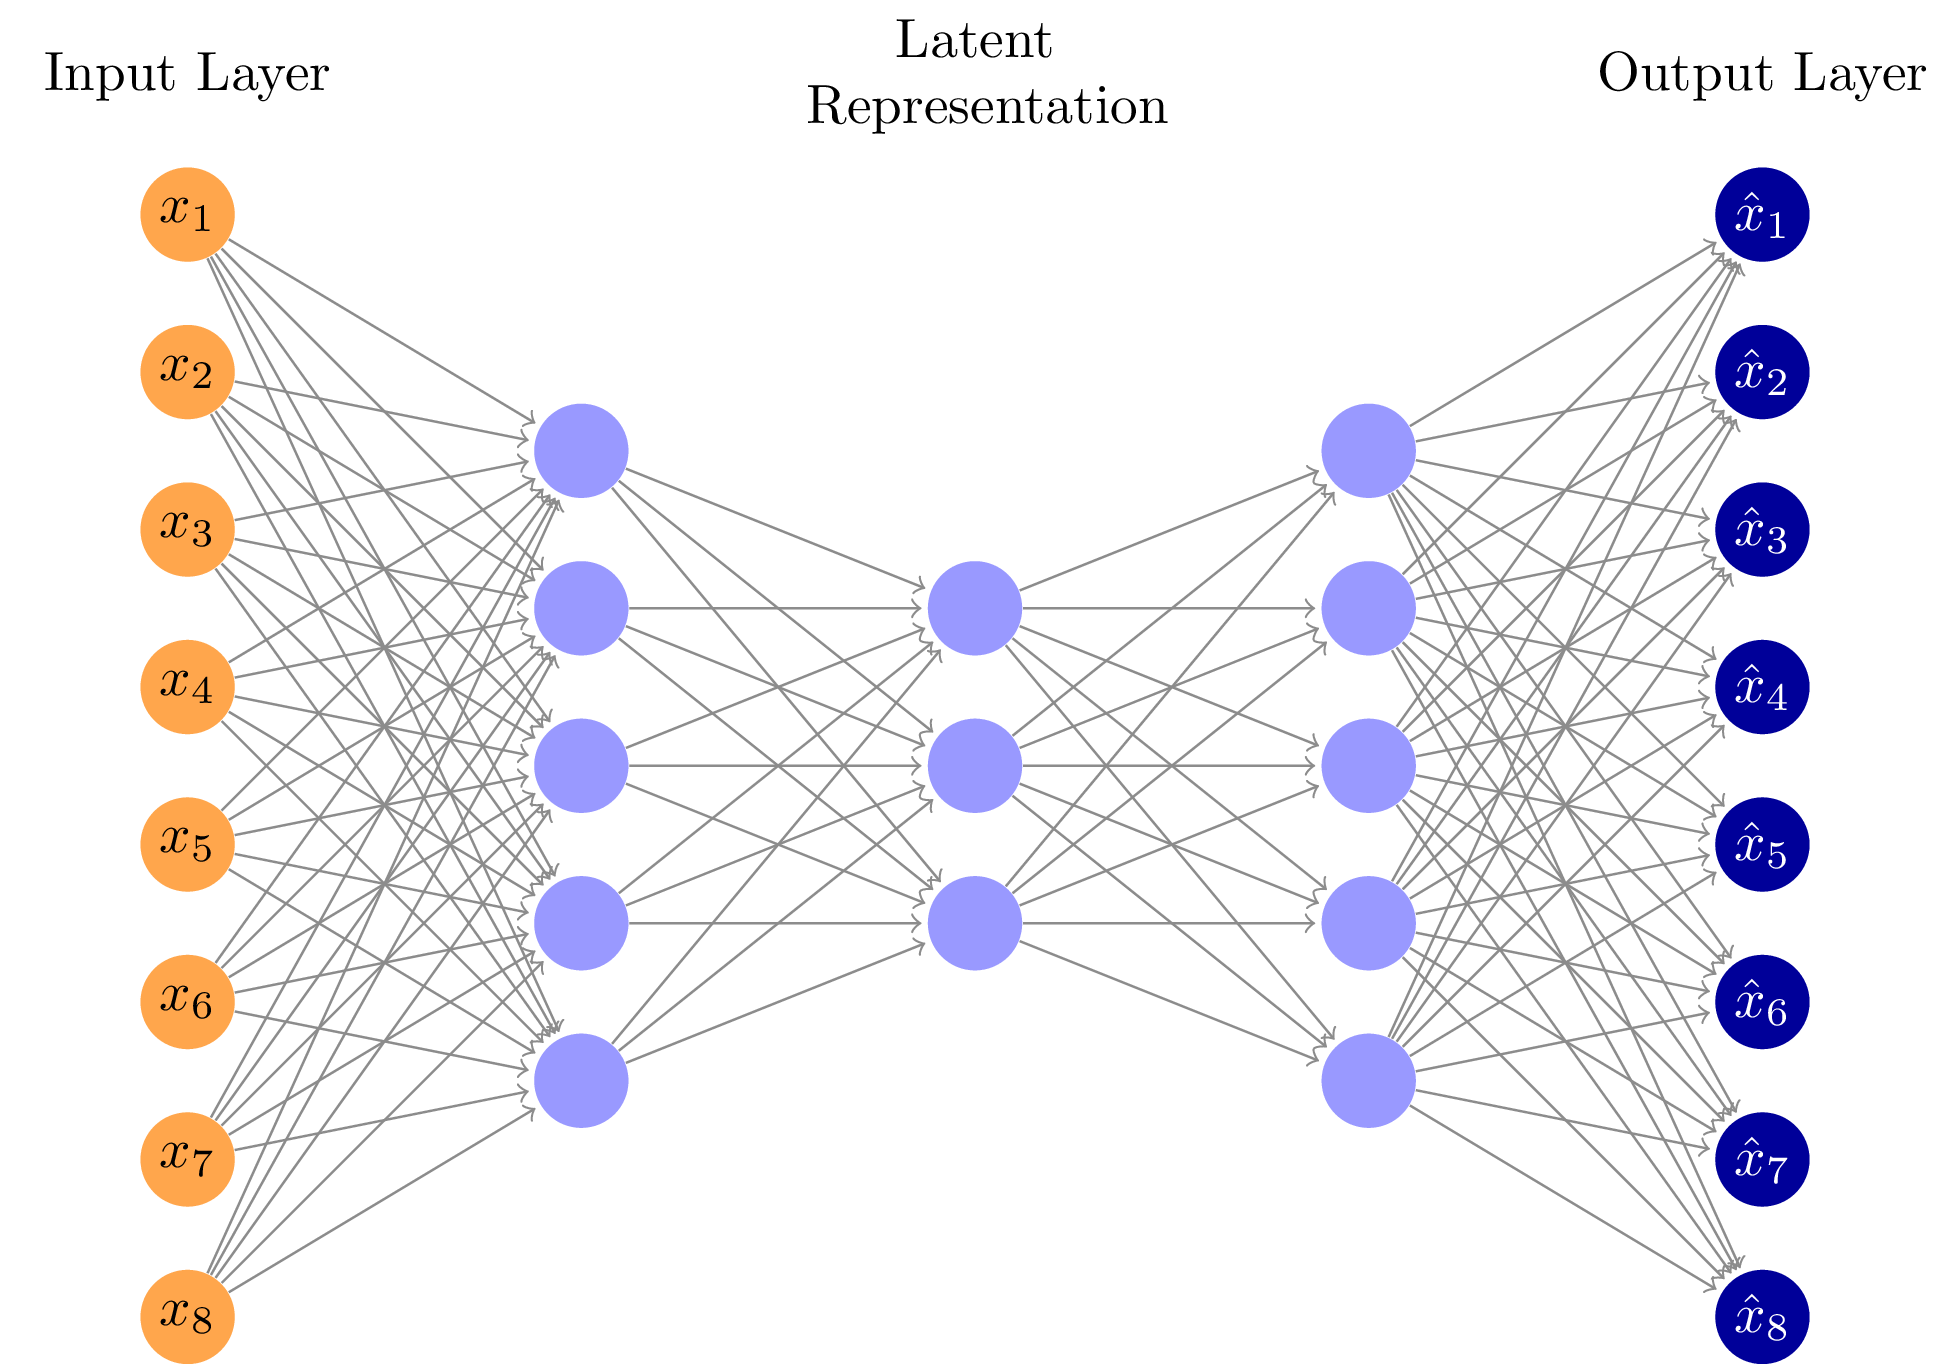

## What we are going to build

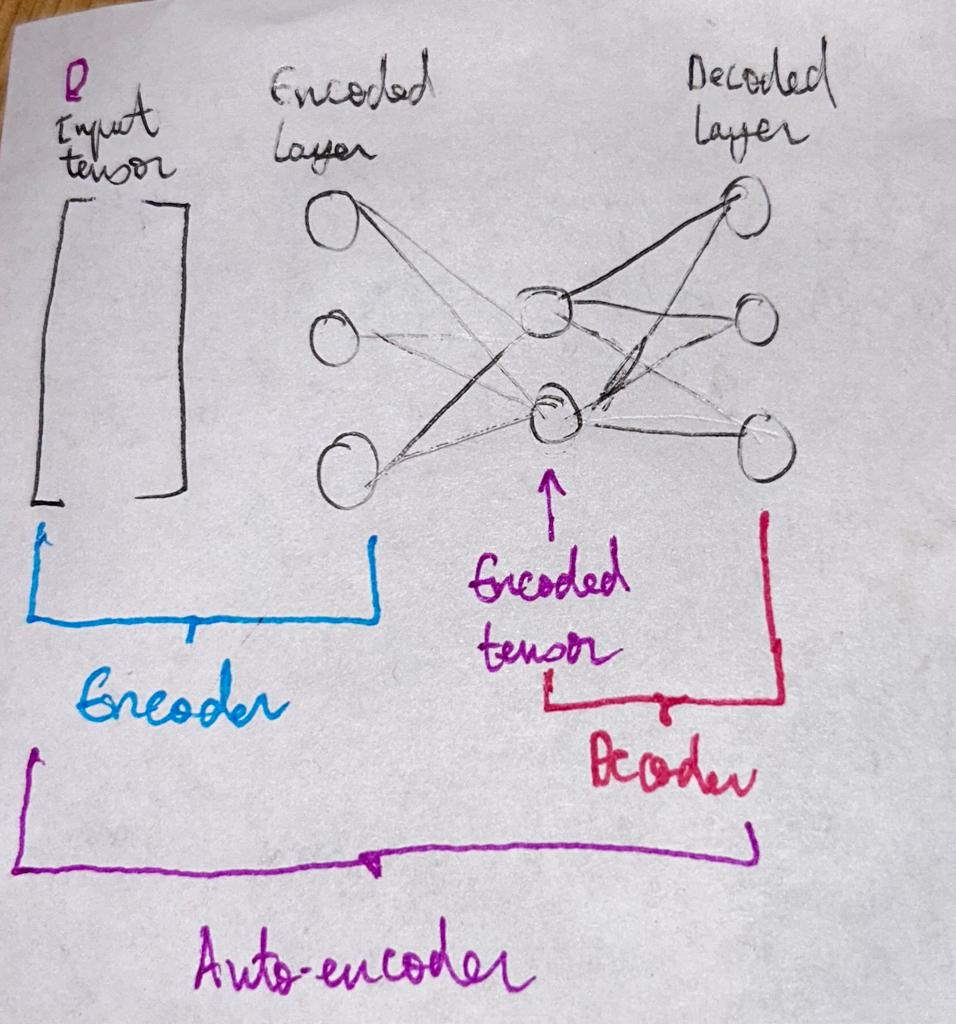

In [ ]:
"""Please refer to the image above"""

encoding_dimension = 64     # 784 / 64 = 12.25 compression factor 
input_shape = 784
input_tensor = keras.Input(shape=(input_shape,))  # tensor input of shape 784 = 28x28

print('input_tensor:', input_tensor.name, input_tensor.shape)

input_tensor: input_5 (None, 784)


### Encoded and Decoded Layers

In [ ]:
# the encoder layer
encoded_layer = layers.Dense(encoding_dimension, activation='relu')(input_tensor) # input layer = encoder

# the decoder layer: receives output of encoded_layer as input
decoded_layer = layers.Dense(input_shape, activation='sigmoid')(encoded_layer)    # output layer = decoder 

print('encoded_layer', encoded_layer.name, encoded_layer.shape)
print('decoded_layer', decoded_layer.name, decoded_layer.shape)

encoded_layer dense_2/Relu:0 (None, 64)
decoded_layer dense_3/Sigmoid:0 (None, 784)


### Encoder

input_tensor input_5 (None, 784)
encoded_layer dense_2/Relu:0 (None, 64)


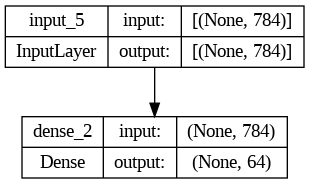

In [ ]:
# create encoder with input_tensor of 784 and Dense layer (encoder_layer) of 64
encoder = keras.Model(input_tensor, encoded_layer)

print('input_tensor', input_tensor.name, input_tensor.shape)
print('encoded_layer', encoded_layer.name, encoded_layer.shape)
plot_model(encoder, to_file='encoder.png', show_shapes=True)

### Autoencoder

input_tensor input_5 (None, 784)
decoded_layer dense_3/Sigmoid:0 (None, 784)


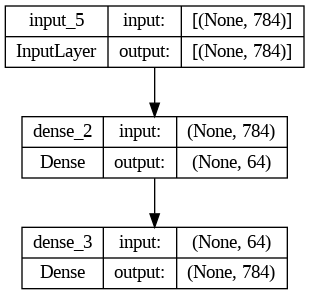

In [ ]:
# autoencoder: receives input_tensor of shape 784 and send it to the decoder
# remember that the decoder_layer was built with the encoder_layer
# decoded_layer = layers.Dense(input_shape, activation='sigmoid')(encoded_layer)
autoencoder = keras.Model(input_tensor, decoded_layer)      # receives an input and decode it

print('input_tensor', input_tensor.name, input_tensor.shape)
print('decoded_layer', decoded_layer.name, decoded_layer.shape)
plot_model(autoencoder, 'autoencoder.png',  show_shapes=True)

## Decoder

In [ ]:

# output of the encoder is the input for the decoder
encoded_tensor = keras.Input(shape=(encoding_dimension, ))      # dimension of 64 for the encoder output

# decoder layers is the last layer of the autoencoder
decoder_layer = autoencoder.layers[-1]

# decoder: receives input from encoder and send it to the decoder (Dense) layer
# decoder = keras.Model(encoder_output_tensor, decoder_layer)

print('encoded_input_tensor', encoded_tensor.name, encoded_tensor.shape)
print('autoencoder.layers', autoencoder.layers)
print('decoder_layer', decoder_layer)
# plot_model(decoder, 'decoder.png',  show_shapes=True)

encoded_input_tensor input_6 (None, 64)
autoencoder.layers [<keras.engine.input_layer.InputLayer object at 0x7f35c9277a00>, <keras.layers.core.dense.Dense object at 0x7f35c92775e0>, <keras.layers.core.dense.Dense object at 0x7f35c9277c70>]
decoder_layer <keras.layers.core.dense.Dense object at 0x7f35c9277c70>


decoder_layer dense_3/Sigmoid:0 (None, 784)


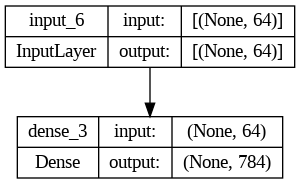

In [ ]:
# links the encoded tensor to the decoder_layer
decoder_layer = decoder_layer(encoded_tensor)

# decode the encoded input of dimension 64 to its full dimension of 784 
decoder = keras.Model(encoded_tensor, decoder_layer)

print('decoder_layer', decoder_layer.name, decoder_layer.shape)
plot_model(decoder, 'decoder.png', show_shapes=True)

## Compiling

In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

## Train

In [ ]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [ ]:
x_train = x_train / 255.
x_test = x_test / 255.
x_train = x_train.reshape((len(x_train), 28*28))
x_test = x_test.reshape((len(x_test), 28*28))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=28,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/28
235/235 [==============================] - 4s 15ms/step - loss: 0.2434 - val_loss: 0.1604
Epoch 2/28
235/235 [==============================] - 4s 17ms/step - loss: 0.1424 - val_loss: 0.1261
Epoch 3/28
235/235 [==============================] - 6s 27ms/step - loss: 0.1175 - val_loss: 0.1077
Epoch 4/28
235/235 [==============================] - 4s 18ms/step - loss: 0.1032 - val_loss: 0.0968
Epoch 5/28
235/235 [==============================] - 4s 15ms/step - loss: 0.0942 - val_loss: 0.0896
Epoch 6/28
235/235 [==============================] - 4s 16ms/step - loss: 0.0882 - val_loss: 0.0848
Epoch 7/28
235/235 [==============================] - 7s 30ms/step - loss: 0.0839 - val_loss: 0.0814
Epoch 8/28
235/235 [==============================] - 4s 15ms/step - loss: 0.0810 - val_loss: 0.0791
Epoch 9/28
235/235 [==============================] - 3s 14ms/step - loss: 0.0790 - val_loss: 0.0774
Epoch 10/28
235/235 [==============================] - 4s 19ms/step - loss: 0.0777 - val_lo

## Test

In [ ]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

print('encoded_imgs.shape', encoded_imgs.shape)
print('decoded_imgs.shape', decoded_imgs.shape)

313/313 [==============================] - 1s 2ms/step
encoded_imgs.shape (10000, 64)
decoded_imgs.shape (10000, 784)


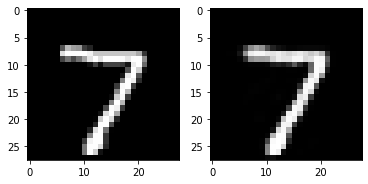

In [ ]:
plt.subplot(121)
plt.imshow(x_test[0].reshape(28,28))
plt.subplot(122)
plt.imshow(decoded_imgs[0].reshape(28,28))